In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [79]:
def plotting(M,x,y,theta_overfit,theta_underfit):
    fig  = plt.figure(figsize = (10,7))
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    Y_overfit=np.zeros((M, 1))
    Y_underfit=np.zeros((M, 1))

    for It in range (0,M):
        np.random.seed()
        eta = sigma*np.random.randn(M, 1)
        a=theta_overfit.shape[0]
        b=theta_underfit.shape[0]
        Y_overfit_temp= (np.dot(np.array([x**0, x,  x**2, x**3, x**4,x**5,  x**6, 
                                          x**7,x**8,  x**9, x**10]).T,theta_overfit[:,It].reshape(a, 1)))
        Y_overfit = np.concatenate((Y_overfit,Y_overfit_temp),axis=1)
        Y_underfit_temp= np.dot(np.array([x**0, x,  x**2]).T,theta_underfit[:,It].reshape(b, 1))
        Y_underfit = np.concatenate((Y_underfit,Y_underfit_temp),axis=1)
        Y_overfit=Y_overfit[:,1:]
        Y_underfit=Y_underfit[:,1:]
        if It % 100 == 0: 
            axes.plot(x,Y_overfit_temp, "b-", linewidth = 2)
            axes.plot(x, Y_underfit_temp, "g-", linewidth = 2)
            axes.set_xlabel("x", fontsize = 18)
            axes.set_ylabel("y", rotation = 0, fontsize = 18)

    axes.plot(x,Y_overfit_temp, "b-", linewidth = 2, label = 'over fit')
    axes.plot(x, Y_underfit_temp, "g-", linewidth = 2, label = 'under fit')
    plt.title('10 graphs chosen randomly')
    plt.legend()
    plt.show()
    
    fig  = plt.figure(figsize = (10,7))
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    
    Y_overfit = np.array([np.mean(Y_overfit, axis=1)]).reshape(M,1)
    Y_underfit = np.array([np.mean(Y_underfit, axis=1)]).reshape(M,1)
    axes.plot(x, Y_overfit, "y-", linewidth = 4, label='overfit average')
    axes.plot(x, Y_underfit, "r-", linewidth = 4,label='underfit average')
    axes.plot(x, y, "g-", linewidth = 2, label = "original")
    axes.set_xlabel("x", fontsize = 18)
    axes.set_ylabel("y", rotation = 0, fontsize = 18)
    plt.title('Average of 1000 graphs')
    axes.legend()        
    plt.show()

# Part i 

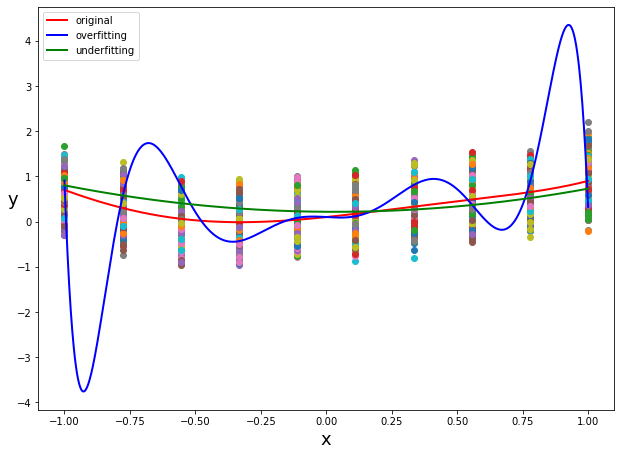

In [80]:
M = 1000
N = 10
sigma = np.sqrt(0.1)
theta = np.array([[0.1, 0.6, 0.5, -0.8, 0.2, 0.3]]).T
X0 = np.ones((N, 1)) 
X1 = np.array([np.linspace(-1,1,10)]).T
X2 = X1**2; X3 = X1**3; X4 = X1**4; X5 = X1**5; X6 = X1**6; X7 = X1**7; 
X8 = X1**8; X9 = X1**9; X10 = X1**10
X_original = np.hstack((X0, X1, X2, X3, X4, X5))
X_overfit = np.hstack((X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10))
X_underfit = np.hstack((X0, X1, X2))

Y=np.zeros((N, 1))

fig  = plt.figure(figsize = (10, 7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for It in range(0, M):
        np.random.seed()
        eta = sigma*np.random.randn(N, 1)
        Y_temp = np.dot(X_original, theta) + eta
        Y = np.concatenate((Y,Y_temp),axis=1)
        axes.scatter(X1, Y_temp)

Y = Y[:,1:]
theta_underfit = np.linalg.inv(X_underfit.T.dot(X_underfit)).dot(X_underfit.T).dot(Y)
theta_overfit = (X_overfit.T).dot(np.linalg.inv(X_overfit.dot(X_overfit.T)).dot(Y))       
      
x = np.linspace(-1, 1, M)
y = 0.1 + 0.6*x + 0.5*x**2 - 0.8*x**3 + 0.2*x**4 + 0.3*x**5
axes.plot(x, y, "r-", linewidth = 2, label = "original")

theta_matrix = np.random.randint(M)      
y_overfit= np.dot(np.array([x**0, x,  x**2, x**3, x**4,x**5,  x**6, x**7,x**8,
                                x**9, x**10]).T,theta_overfit[:,theta_matrix].reshape(11, 1))
axes.plot(x, y_overfit, "b-", linewidth = 2, label = "overfitting")

y_underfit= np.dot(np.array([x**0, x,  x**2]).T,theta_underfit[:,theta_matrix].reshape(3, 1))
axes.plot(x, y_underfit, "g-", linewidth = 2, label = "underfitting")  

axes.set_xlabel("x", fontsize = 18)
axes.set_ylabel("y", rotation = 0, fontsize = 18)
axes.legend()        
plt.show() 

# Part ii and iii 

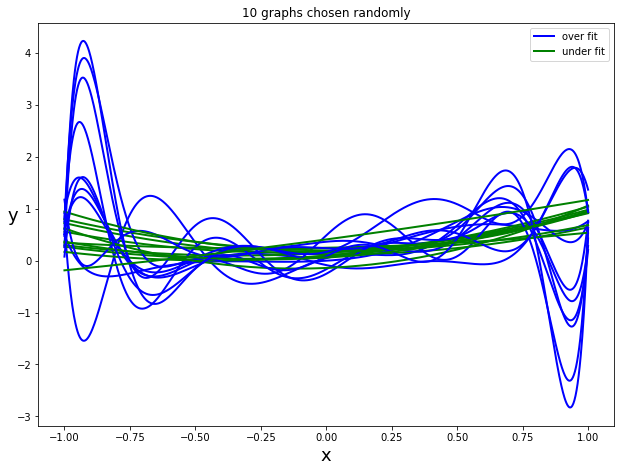

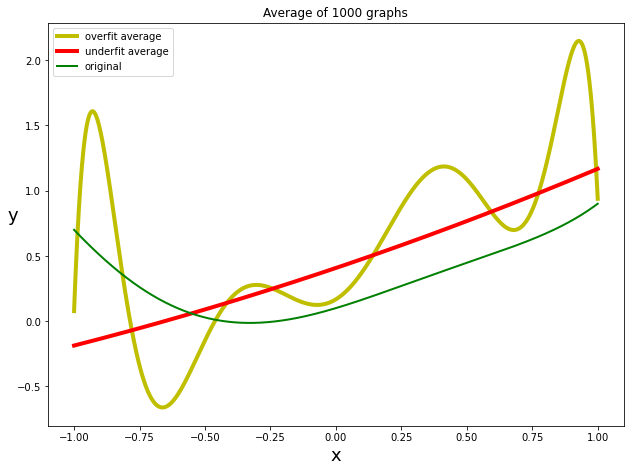

In [81]:
plotting(M,x,y,theta_overfit,theta_underfit)

# Part iv

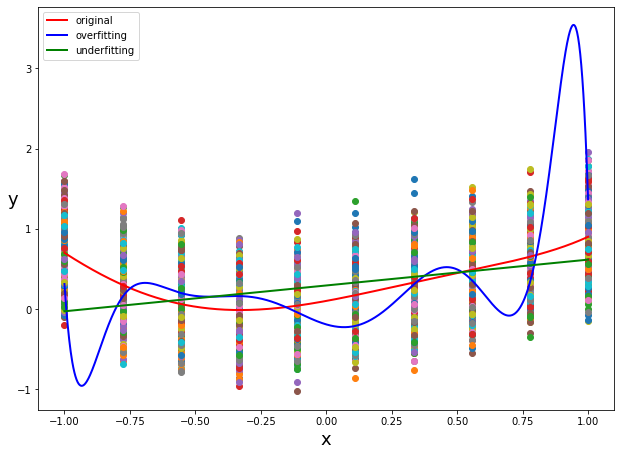

In [82]:
M = 1000
N = 10
sigma = np.sqrt(0.1)
theta = np.array([[0.1, 0.6, 0.5, -0.8, 0.2, 0.3]]).T
X0 = np.ones((N, 1)) 
X1 = np.array([np.linspace(-1,1,10)]).T
X2 = X1**2; X3 = X1**3; X4 = X1**4; X5 = X1**5; X6 = X1**6; X7 = X1**7; X8 = X1**8;
X9 = X1**9; X10 = X1**10; X11 = X1**11; X12 = X1**12; X13 = X1**13; X14 = X1**14
X_original = np.hstack((X0, X1, X2, X3, X4, X5))
X_overfit = np.hstack((X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11,X12, X13, X14))
X_underfit = np.hstack((X0, X1))



Y=np.zeros((N, 1))

fig  = plt.figure(figsize = (10, 7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for It in range(0, M):  # It=1:IterNo
        np.random.seed()
        eta = sigma*np.random.randn(N, 1)
        Y_temp = np.dot(X_original, theta) + eta # output matrix  : Y = X * theta + eta
        Y = np.concatenate((Y,Y_temp),axis=1)
        axes.scatter(X1, Y_temp)

Y = Y[:,1:]

theta_underfit = np.linalg.inv(X_underfit.T.dot(X_underfit)).dot(X_underfit.T).dot(Y)
theta_overfit = (X_overfit.T).dot(np.linalg.inv(X_overfit.dot(X_overfit.T)).dot(Y))  
a=theta_underfit.shape[0]
b=theta_overfit.shape[0]

x = np.linspace(-1, 1, M)
y = 0.1 + 0.6*x + 0.5*x**2 - 0.8*x**3 + 0.2*x**4 + 0.3*x**5

theta_index = np.random.randint(M)  

y_overfit= np.dot(np.array([x**0, x,  x**2, x**3, x**4,x**5,  x**6, x**7,x**8,  x**9, x**10, x**11,
                             x**12,  x**13, x**14]).T,theta_overfit[:,theta_index].reshape(b, 1))

y_underfit= np.dot(np.array([x**0, x]).T,theta_underfit[:,theta_index].reshape(a, 1))

axes.plot(x, y, "r-", linewidth = 2, label = "original")
axes.plot(x, y_overfit, "b-", linewidth = 2, label = "overfitting")
axes.plot(x, y_underfit, "g-", linewidth = 2, label = "underfitting")  
axes.set_xlabel("x", fontsize = 18)
axes.set_ylabel("y", rotation = 0, fontsize = 18)
axes.legend()        
plt.show() 

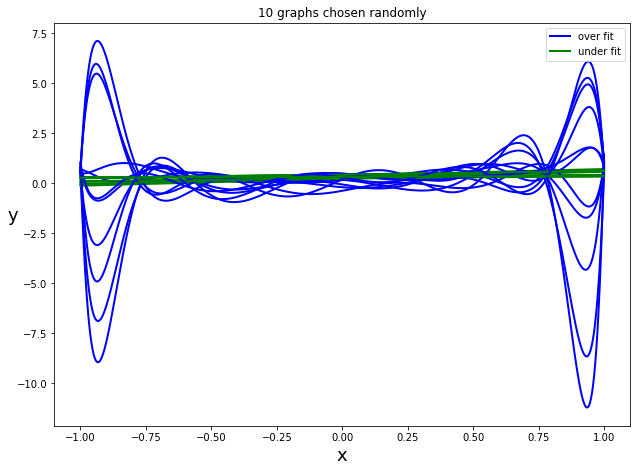

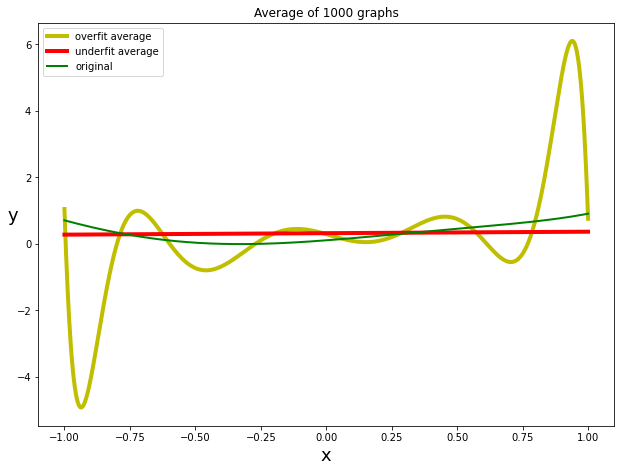

In [83]:
fig  = plt.figure(figsize = (10,7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
Y_overfit=np.zeros((M, 1))
Y_underfit=np.zeros((M, 1))

for It in range (0,M):
    np.random.seed()
    eta = sigma*np.random.randn(M, 1)
    a=theta_overfit.shape[0]
    b=theta_underfit.shape[0]
    
    # 14th order polynomial:
    Y_overfit_temp= (np.dot(np.array([x**0, x,  x**2, x**3, x**4,x**5,  x**6, x**7,x**8,  x**9, x**10, x**11,
                                                 x**12,  x**13, x**14]).T,theta_overfit[:,It].reshape(a, 1))) 
    Y_overfit = np.concatenate((Y_overfit,Y_overfit_temp),axis=1)
    
    # linear equation:
    Y_underfit_temp= np.dot(np.array([x**0, x]).T,theta_underfit[:,It].reshape(b, 1))
    Y_underfit = np.concatenate((Y_underfit,Y_underfit_temp),axis=1)
    
    Y_overfit=Y_overfit[:,1:]
    Y_underfit=Y_underfit[:,1:]
    
    if It % 100 == 0: 
        axes.plot(x,Y_overfit_temp, "b-", linewidth = 2)
        axes.plot(x, Y_underfit_temp, "g-", linewidth = 2)
        axes.set_xlabel("x", fontsize = 18)
        axes.set_ylabel("y", rotation = 0, fontsize = 18)

axes.plot(x,Y_overfit_temp, "b-", linewidth = 2, label = 'over fit')
axes.plot(x,Y_underfit_temp, "g-", linewidth = 2, label = 'under fit')    
plt.title('10 graphs chosen randomly')
plt.legend()
plt.show()


fig  = plt.figure(figsize = (10,7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

Y_overfit = np.array([np.mean(Y_overfit, axis=1)]).reshape(M,1)
Y_underfit = np.array([np.mean(Y_underfit, axis=1)]).reshape(M,1)

axes.plot(x, Y_overfit, "y-", linewidth = 4, label='overfit average')
axes.plot(x, Y_underfit, "r-", linewidth = 4,label='underfit average')
axes.plot(x, y, "g-", linewidth = 2, label = "original")
axes.set_xlabel("x", fontsize = 18)
axes.set_ylabel("y", rotation = 0, fontsize = 18)
plt.title('Average of 1000 graphs')
axes.legend()        
plt.show()

# Comments:

***1. Choosing a higher order polynomial (10th or 14th order) overfits the original data and choosing a lower order polynomial (2nd or 1st order) polynomial underfits the data, this is because the actual data is generated using 5th order polynomial.***

***2. Choosing higher noise variance results in wider spread of data points which inturn results in larger variation of polynomial and creates a greater deviation between actual curve and predicted curves using either of the polynomials.***